# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     |Nicolás Martínez Gutiérrez   |
| **Fecha**      1/09/2025|   |
| **Expediente**751746 |   |

## Regresión polinomial

Observa la siguiente gráfica.

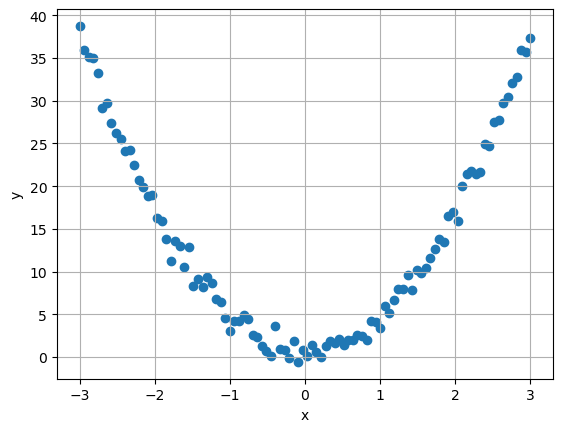

In [117]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.show()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4*x**2 + np.random.normal(0, 1, 100)

In [119]:
X = x.reshape(-1, 1)

In [120]:
lr = LinearRegression()

In [121]:
lr.fit(X, y)

LinearRegression()

In [122]:
lr.intercept_

np.float64(13.30223225795873)

In [123]:
lr.coef_

array([-0.04955448])

$$ \hat{y} = 13.30223225795873 - 0.04955448{\beta_1}x $$

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

In [124]:
y_pred = lr.predict(X)

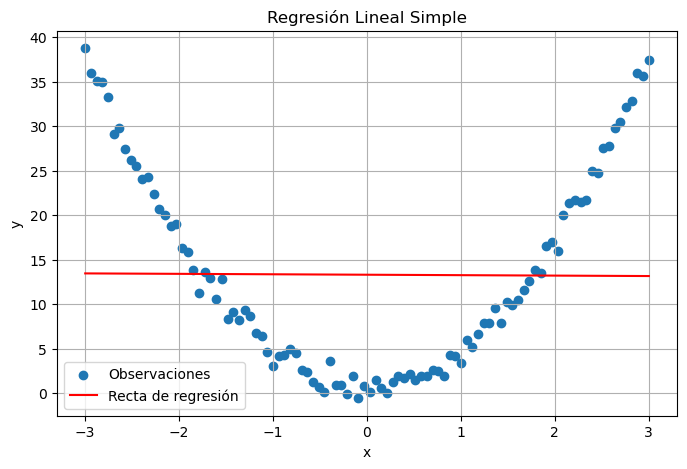

In [125]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Observaciones")
plt.plot(x, y_pred, color="red", label="Recta de regresión")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión Lineal Simple")
plt.legend()
plt.grid(True)
plt.show()

In [126]:
from sklearn.metrics import r2_score

In [127]:
r2_score(y, y_pred)

5.80345273922811e-05

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [128]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4*x**2 + np.random.normal(0, 1, 100)

In [129]:
X = np.column_stack([x, x**2])

In [130]:
lr = LinearRegression()

In [131]:
lr.fit(X, y)

LinearRegression()

In [132]:
lr.intercept_

np.float64(0.619420963180481)

In [133]:
lr.coef_

array([-0.04955448,  4.14388884])

$$ \hat{y} = 0.6194 - 0.04955x + 4.1439x^2 $$

#### R2

In [134]:
y_pred = lr.predict(X)

In [135]:
r2_score(y, y_pred)

0.9934118040713642

Crea una gráfica con las observaciones y la nueva curva que ajustaste.

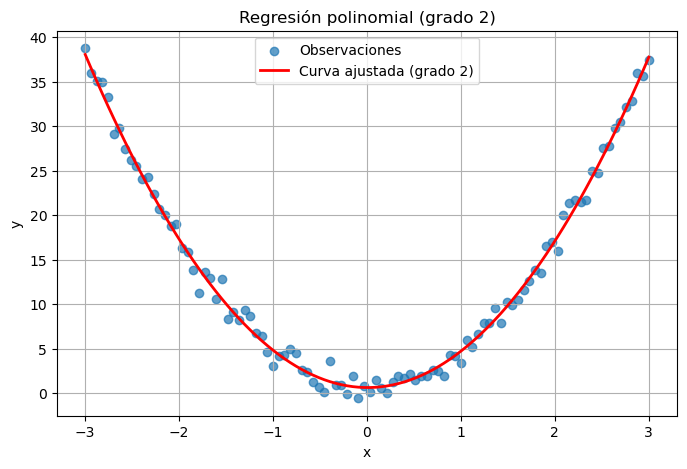

In [136]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Observaciones", alpha=0.7)
plt.plot(x, y_pred, color="red", linewidth=2, label="Curva ajustada (grado 2)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión polinomial (grado 2)")
plt.legend()
plt.grid(True)
plt.show()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

#### Grado 3

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4*x**2 + np.random.normal(0, 1, 100)

X = np.column_stack([x, x**2, x**3])

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [138]:
lr.intercept_

np.float64(0.619420963180481)

In [139]:
lr.coef_

array([-6.55753967e-02,  4.14388884e+00,  2.90847549e-03])

$$ \hat{y} = 0.6194 - 0.0006557x + 4.1439x^2 + 0.002908x^3 $$

#### R2

In [140]:
y_pred = lr.predict(X)
r2_score(y, y_pred)

0.9934129585186598

#### Grado 5

In [141]:
X = np.column_stack([x, x**2, x**3, x**4, x**5])

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [142]:
lr.intercept_

np.float64(0.6337116478282763)

In [143]:
lr.coef_

array([-2.76393644e-01,  4.12831746e+00,  1.10135698e-01,  1.97920171e-03,
       -1.05167018e-02])

$$ \hat{y} = 0.6337 - 0.02764x + 4.1283x^2 + 0.1101x^3 + 0.001979x^4 - 0.0105167x^5 $$

#### R2

In [144]:
y_pred = lr.predict(X)
r2_score(y, y_pred)

0.9934954953676421

#### Grado 7

In [145]:
X = np.column_stack([x, x**2, x**3, x**4, x**5, x**6, x**7])

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [146]:
lr.intercept_

np.float64(0.6101810919962265)

In [147]:
lr.coef_

array([-1.75155617e-01,  4.18219958e+00,  1.07431886e-02, -1.56446593e-02,
        1.33331414e-02,  1.40889740e-03, -1.61012799e-03])

$$ \hat{y} = 0.6102 - 0.1752x + 4.1822x^2 + 0.01074x^3 - 0.01564x^4 + 0.01333x^5 + 0.001409x^6 - 0.001610x^7 $$

#### R2

In [148]:
y_pred = lr.predict(X)
r2_score(y, y_pred)

0.9935089341876935

#### Grado 9 

In [149]:
X = np.column_stack([x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9])

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [150]:
lr.intercept_

np.float64(0.5890185996496538)

In [151]:
lr.coef_

array([-1.10778098e-01,  4.26535653e+00, -9.23732104e-02, -6.55597796e-02,
        5.72464222e-02,  1.08500851e-02, -8.45937252e-03, -5.51840642e-04,
        3.53081565e-04])

$$ \hat{y} = 0.5890 - 0.1108x + 4.2654x^2 - 0.09237x^3 - 0.06556x^4 + 0.05725x^5 + 0.01085x^6 - 0.008459x^7 - 0.0005518x^8 + 0.0003531x^9 $$

#### R2

In [152]:
y_pred = lr.predict(X)
r2_score(y, y_pred)

0.9935141799662259

#### Grado 11

In [153]:
X = np.column_stack([x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11])

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [154]:
lr.intercept_

np.float64(0.5670839644956622)

In [155]:
lr.coef_

array([ 9.00703987e-02,  4.39720527e+00, -5.68294874e-01, -1.90428125e-01,
        3.69496567e-01,  5.17798355e-02, -9.13700221e-02, -5.98142327e-03,
        9.92036867e-03,  2.50411792e-04, -3.99285153e-04])

$$ \hat{y} = 0.5671 + 0.09007x + 4.3792x^2 - 0.5683x^3 - 0.1905x^4 + 0.03695x^5 + 0.05178x^6 - 0.09137x^7 - 0.005981x^8 + 0.009290x^9 + 0.0002504x^{10} - 0.0003993x^{11} $$

#### R2

In [156]:
y_pred = lr.predict(X)
r2_score(y, y_pred)

0.9935338704150221

Crea una gráfica por cada modelo con las observaciones y su curva.

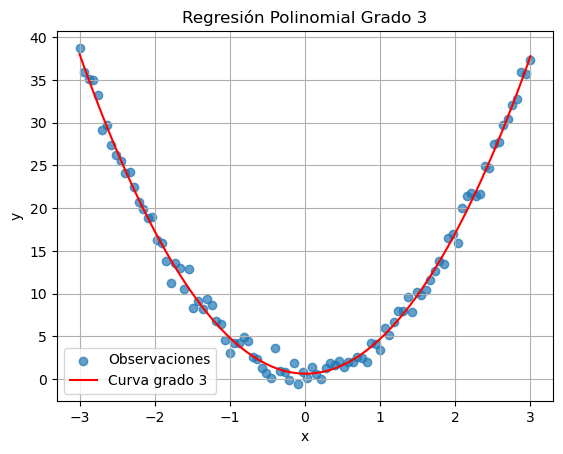

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4*x**2 + np.random.normal(0, 1, 100)

X = np.column_stack([x, x**2, x**3])

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)

plt.scatter(x, y, label="Observaciones", alpha=0.7)
plt.plot(x, y_pred, color="red", label="Curva grado 3")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión Polinomial Grado 3")
plt.legend()
plt.grid(True)
plt.show()

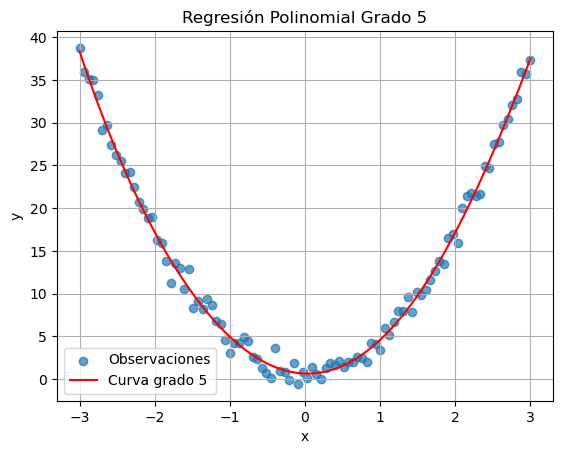

In [158]:
X = np.column_stack([x, x**2, x**3, x**4, x**5])

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

plt.scatter(x, y, label="Observaciones", alpha=0.7)
plt.plot(x, y_pred, color="red", label="Curva grado 5")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión Polinomial Grado 5")
plt.legend()
plt.grid(True)
plt.show()

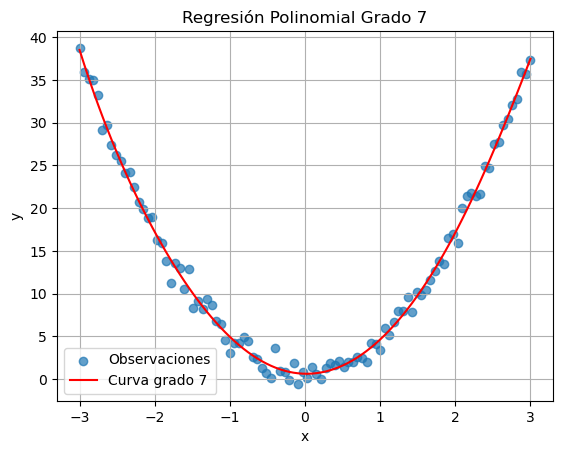

In [159]:
X = np.column_stack([x, x**2, x**3, x**4, x**5, x**6, x**7])

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

plt.scatter(x, y, label="Observaciones", alpha=0.7)
plt.plot(x, y_pred, color="red", label="Curva grado 7")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión Polinomial Grado 7")
plt.legend()
plt.grid(True)
plt.show()

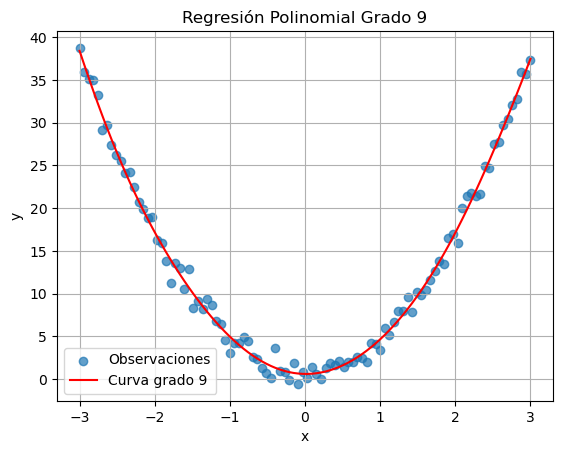

In [160]:
X = np.column_stack([x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9])

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

plt.scatter(x, y, label="Observaciones", alpha=0.7)
plt.plot(x, y_pred, color="red", label="Curva grado 9")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión Polinomial Grado 9")
plt.legend()
plt.grid(True)
plt.show()

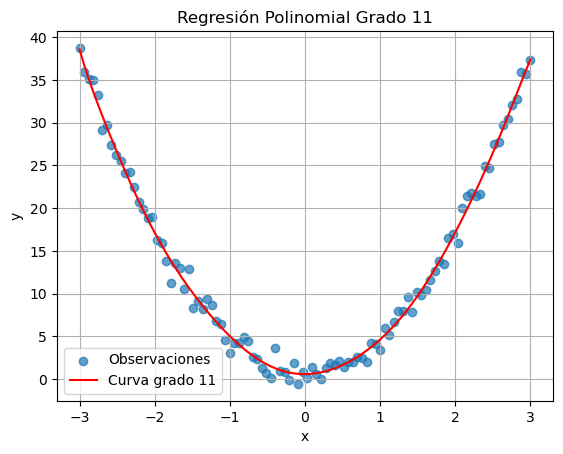

In [161]:
X = np.column_stack([x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11])

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

plt.scatter(x, y, label="Observaciones", alpha=0.7)
plt.plot(x, y_pred, color="red", label="Curva grado 11")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión Polinomial Grado 11")
plt.legend()
plt.grid(True)
plt.show()

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

El mejor modelo en este caso es el polinomial de grado 2, ya que aunque al aumentar el grado (3, 5, 7, 9 y 11) los valores de 𝑅 2 R 2 también son muy altos, en realidad no mejoran de forma significativa respecto al modelo cuadrático. El modelo de grado 2 ya captura correctamente la forma parabólica de los datos, porque la relación original que se generó sigue justamente una ecuación cuadrática. Cuando se utilizan grados más altos, el ajuste puede volverse innecesariamente complejo, ya que el modelo comienza a incluir términos que no aportan valor real y que podrían sobreajustar los datos, aprendiendo demasiado el ruido en lugar de la tendencia verdadera. Esto significa que, aunque el R2 siga siendo alto, el modelo deja de ser el más simple y adecuado. En conclusión, el modelo de grado 2 es el mejor porque explica casi toda la variabilidad de los datos (R2 = 0.993), es el más sencillo y refleja la verdadera relación entre x y y, además de evitar la complejidad innecesaria y el riesgo de sobreajuste que aparece con grados muy altos.

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [162]:
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4*x**2 + np.random.normal(0, 1, 100)

X2 = np.column_stack([x**k for k in range(1, 2+1)])
lr2 = LinearRegression()
lr2.fit(X2, y)

x_pred = np.array([[5**k for k in range(1, 2+1)]])
y_pred2 = lr2.predict(x_pred)
y_pred2

array([103.96886955])

In [163]:
X3 = np.column_stack([x**k for k in range(1, 3+1)])
lr3 = LinearRegression()
lr3.fit(X3, y)

x_pred = np.array([[5**k for k in range(1, 3+1)]])
y_pred3 = lr3.predict(x_pred)
y_pred3

array([104.25232439])

In [164]:
X5 = np.column_stack([x**k for k in range(1, 5+1)])
lr5 = LinearRegression()
lr5.fit(X5, y)

x_pred = np.array([[5**k for k in range(1, 5+1)]])
y_pred5 = lr5.predict(x_pred)
y_pred5

array([84.59895013])

In [165]:
X7 = np.column_stack([x**k for k in range(1, 7+1)])
lr7 = LinearRegression()
lr7.fit(X7, y)

x_pred = np.array([[5**k for k in range(1, 7+1)]])
y_pred7 = lr7.predict(x_pred)
y_pred7

array([33.74321848])

In [166]:
X9 = np.column_stack([x**k for k in range(1, 9+1)])
lr9 = LinearRegression()
lr9.fit(X9, y)

x_pred = np.array([[5**k for k in range(1, 9+1)]])
y_pred9 = lr9.predict(x_pred)
y_pred9

array([215.73637926])

In [167]:
X11 = np.column_stack([x**k for k in range(1, 11+1)])
lr11 = LinearRegression()
lr11.fit(X11, y)

x_pred = np.array([[5**k for k in range(1, 11+1)]])
y_pred11 = lr11.predict(x_pred)
y_pred11

array([-5265.34425354])

¿Cuál modelo crees que sea mejor?

El mejor modelo es el polinomial de grado 2, ya que al extrapolar en 𝑥 = 5 x=5 predijo un valor cercano a 103.97, muy próximo al valor teórico esperado (101) según la ecuación generadora de los datos y = 1 + 4x2 + e. Aunque los modelos de grados más altos (3, 5, 7, 9 y 11) tienen un R2 elevado dentro del rango de entrenamiento, al momento de extrapolar producen valores poco realistas, como 33.74 en el grado 7, 215.74 en el grado 9 e incluso −5265 en el grado 11, lo que muestra un claro sobreajuste. Por ello, el modelo cuadrático es el más adecuado: explica correctamente la relación verdadera entre las variables, ofrece predicciones consistentes y evita la complejidad innecesaria de los modelos de grado mayor.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3